# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.proportion import confint_proportions_2indep
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

da = pd.read_csv('/content/drive/My Drive/nhanes_2015_2016.csv')

In [ ]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [ ]:
# check content of gender column
da.RIAGENDR.unique()

array([1, 2])

In [ ]:
da.SMQ020.unique()

array([1, 2, 7, 9])

In [ ]:
nobs_female = (da.RIAGENDR == 2).sum()
count_female = ((da.RIAGENDR == 2)&(da.SMQ020 == 1)).sum()
nobs_male = (da.RIAGENDR == 1).sum()
count_male = ((da.RIAGENDR == 1)&(da.SMQ020 == 1)).sum()


z_stat, p_value = proportions_ztest([count_female, count_male], [nobs_female, nobs_male], alternative='two-sided')
z_stat, p_value

(-16.01400681759787, 1.0202277513491146e-57)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

The extremely small p-value, well below the significance level of 0.05, suggests strong evidence to reject the null hypothesis. There is a substantial and statistically significant difference in smoking proportions between women and men in the given dataset.

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [ ]:
# confidence interval for proportion of women who smoke

p= count_female/nobs_female
n=nobs_female
print(p,n)
sm.stats.proportion_confint(n * p, n, alpha=0.05, method='normal')

0.30443548387096775 2976


(0.2879026244757051, 0.3209683432662304)

In [ ]:
# confidence interval for proportion of women who smoke

p= count_male/nobs_male
n=nobs_male
print(p,n)
sm.stats.proportion_confint(n * p, n, alpha=0.05, method='normal')

0.5121420804639362 2759


(0.49349056386167417, 0.5307935970661982)

In [ ]:
#confidence interval for the difference between male and female proportions.
diff_confint=confint_proportions_2indep(count_male,nobs_male,count_female,nobs_female,method=None,compare='diff',alpha=0.05,correction=True)
diff_confint

(0.18261740933884565, 0.23243603176242983)

__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

The confidence intervals support because they show that there is a substantial and statistically significant difference in smoking proportions between women and men in the given dataset. They indicate that the male proportion is substantially larger.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [ ]:
#examine education column
da.DMDEDUC2.unique()

array([ 5.,  3.,  4.,  2., nan,  1.,  9.])

In [ ]:
# examine height column
da.BMXHT.describe()

count    5673.000000
mean      166.142834
std        10.079264
min       129.700000
25%       158.700000
50%       166.000000
75%       173.500000
max       202.700000
Name: BMXHT, dtype: float64

In [ ]:
da.BMXHT.isnull().sum()

62

In [ ]:
# remove null vallues and those that dont know
df=da.loc[(da.DMDEDUC2.notnull())&(da.BMXHT.notnull())&(da.DMDEDUC2!=9)]
df.DMDEDUC2.unique(),df.BMXHT.isnull().sum()

(array([5., 3., 4., 2., 1.]), 0)

In [ ]:
# hypothesis testing using centimeters

col_height= df.loc[(df.DMDEDUC2 == 5)]['BMXHT']
no_col_height= df.loc[(df.DMDEDUC2 != 5)]['BMXHT']
sm.stats.ztest(col_height, no_col_height)


(7.569245765210209, 3.7539736083220206e-14)

In [ ]:
# hypothesis testing using inches

df.loc[:,'BMXHT'] =df.loc[:,'BMXHT']/2.54

col_height= df.loc[(df.DMDEDUC2 == 5)]['BMXHT']
no_col_height= df.loc[(df.DMDEDUC2 != 5)]['BMXHT']
sm.stats.ztest(col_height, no_col_height)

<ipython-input-79-29c88b76cf34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'BMXHT'] =df.loc[:,'BMXHT']/2.54


(7.569245765210218, 3.753973608321762e-14)

__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

Yes I am confident because the p value is really small and way below the significance level of 0.05 showing that the null hypothesis should be rejected

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

They are bascically the same

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [ ]:
#examine BMI
da.BMXBMI.describe()

count    5662.000000
mean       29.382197
std         7.095921
min        14.500000
25%        24.300000
50%        28.300000
75%        33.000000
max        67.300000
Name: BMXBMI, dtype: float64

In [ ]:
da.BMXBMI.isnull().sum()

73

In [ ]:
# hypothesis testing using bmi
BMI_30_40= da.loc[(da.RIAGENDR==1)&(da.RIDAGEYR >= 30)&(da.RIDAGEYR <= 40)&(da.BMXBMI.notnull())]['BMXBMI']
BMI_50_60= da.loc[(da.RIAGENDR==1)&(da.RIDAGEYR >= 50)&(da.RIDAGEYR <= 60)&(da.BMXBMI.notnull())]['BMXBMI']
BMI_50_60.mean(),BMI_30_40.mean()

(29.25, 29.61372950819672)

In [ ]:
sm.stats.ztest(BMI_30_40, BMI_50_60)

(0.8984008016755222, 0.36897190924214873)

In [ ]:
# hypothesis testing using log (bmi)
BMI_30_40= np.log(da.loc[(da.RIAGENDR==1)&(da.RIDAGEYR >= 30)&(da.RIDAGEYR <= 40)&(da.BMXBMI.notnull())]['BMXBMI'])
BMI_50_60= np.log(da.loc[(da.RIAGENDR==1)&(da.RIDAGEYR >= 50)&(da.RIDAGEYR <= 60)&(da.BMXBMI.notnull())]['BMXBMI'])
BMI_50_60.mean(),BMI_30_40.mean()

(3.356230206122632, 3.3653907870271915)

In [ ]:
sm.stats.ztest(BMI_30_40, BMI_50_60)

(0.7057844184100666, 0.4803222133688403)

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

Both BMI and log BMI do not significantly differ between the age bands as the p values are

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [ ]:
df=da.loc[(da.DMDEDUC2.notnull())&(da.DMDEDUC2!=9)&(da.BMXBMI.notnull())]
grad_women_30_40= df.loc[(df.RIAGENDR == 2)&(df.RIDAGEYR >= 30)&(df.RIDAGEYR <= 40)&(df.DMDEDUC2 == 5)]['BMXBMI']
not_grad_women_30_40= df.loc[(df.RIAGENDR == 2)&(df.RIDAGEYR >= 30)&(df.RIDAGEYR <= 40)&(df.DMDEDUC2 != 5)]['BMXBMI']


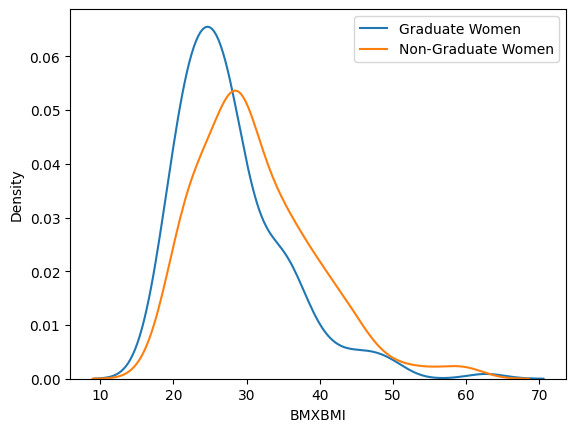

In [ ]:
# Graphical representation of subpopulation variance
sns.kdeplot(grad_women_30_40, label="Graduate Women")
sns.kdeplot(not_grad_women_30_40, label="Non-Graduate Women")


plt.legend()

In [ ]:
# description of graduate women bmi
grad_women_30_40.describe()

count    171.000000
mean      27.808187
std        7.358264
min       17.100000
25%       22.750000
50%       26.300000
75%       31.150000
max       62.700000
Name: BMXBMI, dtype: float64

In [ ]:
# description of non-graduate women bmi
not_grad_women_30_40.describe()

count    354.000000
mean      31.257345
std        8.256083
min       16.600000
25%       25.300000
50%       29.500000
75%       35.875000
max       60.900000
Name: BMXBMI, dtype: float64

In [ ]:
# estimated subpopulation variances

print("Graduate women variance :", grad_women_30_40.var())
print("Non-Graduate women variance :", not_grad_women_30_40.var())


Graduate women variance : 54.1440502235982
Non-Graduate women variance : 68.16290624349803


In [ ]:
n1 = len(grad_women_30_40)
s1= grad_women_30_40.std()
n2= len(not_grad_women_30_40)
s2= not_grad_women_30_40.std()

pooled_estimate = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)) * np.sqrt((1 / n1) + (1 / n2))
unpooled_estimate = np.sqrt((s1**2 / n1) + (s2**2 / n2))


print("pooled estimate of the standard error :", pooled_estimate)
print("unpooled estimates of the standard error :", unpooled_estimate)



pooled estimate of the standard error : 0.7427272812742616
unpooled estimates of the standard error : 0.7135702174708334


In [ ]:
grad_women_30_40 = sm.stats.DescrStatsW(grad_women_30_40)
not_grad_women_30_40 = sm.stats.DescrStatsW(not_grad_women_30_40)

print("pooled: ", sm.stats.CompareMeans(grad_women_30_40, not_grad_women_30_40).ztest_ind(usevar='pooled'))
print("unequal: ", sm.stats.CompareMeans(grad_women_30_40, not_grad_women_30_40).ztest_ind(usevar='unequal'))

pooled:  (-4.643908450956424, 3.4187910067116893e-06)
unequal:  (-4.833662355599101, 1.340438616920389e-06)


__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

The BMI values between the two populations are not equal, leading us to reject the null hypothesis. This decision is based on a very small p-value, which falls below our predetermined significance level for the alternative hypothesis.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

The difference between the two variances is not so significant. This is resulted in a similar outcome in the hypothesis test

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [ ]:
df=da.loc[(da.BPXDI1.notnull())&(da.BPXDI2.notnull())]
df = df.BPXDI1 - df.BPXDI2
sm.stats.ztest(df)

(4.140387087476751, 3.467202439743513e-05)

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

The extremely small p-value, well below the significance level of 0.05, suggests strong evidence to reject the null hypothesis. There is a substantial and statistically significant difference in the first and second diastolic blood pressure measurements

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [ ]:
f_bp = da.loc[(da.BPXDI1.notnull()),'BPXDI1']
s_bp = da.loc[(da.BPXDI2.notnull()),'BPXDI2']

sm.stats.ztest(f_bp, s_bp)

(0.6848982193746492, 0.49340814971248503)

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

The first method used assumes paired data. In this situation the test revealed that the two blood pressures are statistically different. In the second method paired data is not assumed and the test indicated that the p value is higher than the significance level so we fail to reject the null hypothesis and accept that the two blood presser